In [57]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
import json
from matplotlib.patches import Rectangle


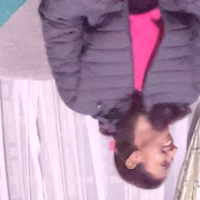

In [102]:
images = os.path.join('data','train','images')
labels=os.path.join('data','train','labels')

files=os.listdir(images)
ind=random.randint(0,len(files)-1)
name=files[ind].split(".")[0]
img = Image.open(os.path.join(images,f'{name}.jpg'))
newsize = (200, 200)
img = img.resize(newsize)
img

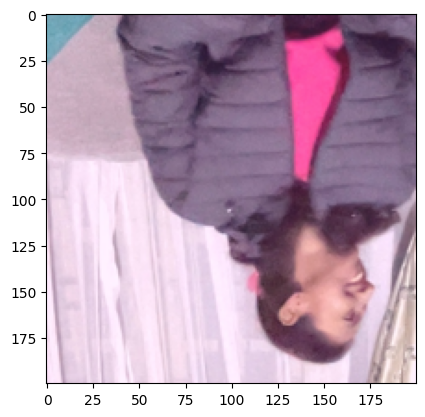

In [103]:
fig,axs=plt.subplots(1,1)
img = np.asarray(img)    
label_source_file = os.path.join(labels, f'{name}.json')
axs.imshow(img)
try:
    with open(label_source_file) as f:
        label = json.load(f)
        #scaling image down by 3 times means scale down points by 3
        points = np.array(label['shapes'][0]['points']).reshape(4,)/3

except FileNotFoundError:
    # If file not found, set default values for the bounding box
    points=np.array([0,0,0.0000001,0.0000001])

x_min = points[0]
y_min = points[1]
w = points[2] - points[0]
h = points[3] - points[1]
axs.imshow(img)
axs.add_patch(Rectangle((x_min, y_min), w, h,
                                  edgecolor='red',
                                  fill=False))

In [104]:
img=img/255
img=img.reshape(-1,)
#bboxes range from 0 to 1
points=points/200
print(img)
print(points)

[0.41568627 0.63921569 0.69803922 ... 0.99215686 0.9372549  0.98431373]
[1.68054348 1.77184783 2.70771739 2.79902174]


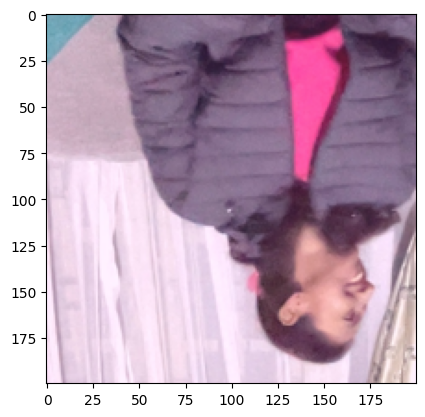

In [105]:
fig,axs=plt.subplots(1,1)
points_p=points*200
img_p=(img*255).reshape(200,200,3).astype(int)

x_min = points_p[0]
y_min = points_p[1]
w = points_p[2] - points_p[0]
h = points_p[3] - points_p[1]


axs.imshow(img_p)
axs.add_patch(Rectangle((x_min, y_min), w, h,
                                  edgecolor='red',
                                  fill=False))